In [1]:
from obspy.signal.array_analysis import SeismicArray as AA

# Introduction to Array Seismology Methods

 #### 1. Seismograms, move-out
 #### 2. Vespagrams, linear and 4th root
 #### 3. Phase Weighted Stack (PWS)
 #### 4. Array Response Function
 #### 5. Slowness-Backazimuth plots
 #### 6. Frequency-Wavenumaber analysis

This practical introduces the most common array processing techniques used for array seismology studies. 
We will introduce standard techniques and use them on selected examples from an event recorded at the German Regional Seismic Network (GRSN) and a recently deployed array in Morocco (Muenster Morocco array, MM) and teleseismic events.


           



   #### Information for each event
<table>
       <tr>
        <th>#</th> <th>date</th> <th>time</th> <th>lat</th> <th>lon</th> <th>depth(km)</th> <th>magn</th> <th>array</th> <th>phase</th>
        </tr>
        <tr>
            <td>1</td> <td>17 DEC 1991</td> <td>06:38:17</td> <td>47.429</td> <td>151.484</td> <td>150</td> <td>5.5</td> <td>GRF,GRSN</td>     <td>P, PcP</td>
        </tr>
        <tr>
            <td>2</td> <td>14 AUG 2012</td> <td>02:59:38</td> <td>49.80</td> <td>145.064</td> <td>583</td> <td>7.7</td> <td>MM</td>     <td>P, PP</td>
        </tr>
        <tr>
            <td>3</td> <td>14 AUG 2012</td> <td>02:59:38</td> <td>49.80</td> <td>145.064</td> <td>583</td> <td>7.7</td> <td>YKA</td>     <td>diff, PP</td>
        </tr>
        <tr>
            <td>4</td> <td>05 MAY 2003</td> <td>23:04:45</td> <td>3.645</td> <td>128.010</td> <td>61</td> <td>6.2</td> <td>KNET</td>     <td>mislo, pP</td>
        </tr>
        <tr>
            <td>5</td> <td>04 OCT 2002</td> <td>19:05:50</td> <td>-20.96</td> <td>-178.86</td> <td>630</td> <td>6.3</td> <td>EAGLE</td>     <td>scattering</td>
           </tr>
        <tr>
        
</table>        
Please keep in mind that the **data** are **accesible** at **/home/mess/Desktop/data**.

For example for the Morocco event: /home/mess/Desktop/data/02_MM/02.mseed

### **Getting Genral information of each event and array

**a)** Plot the morocco event (14 AUG 2012) on a world map (using QuakeML file)


1 Event(s) in Catalog:
2012-08-14T02:59:38.460000Z | +49.800, +145.064 | 7.7 MW


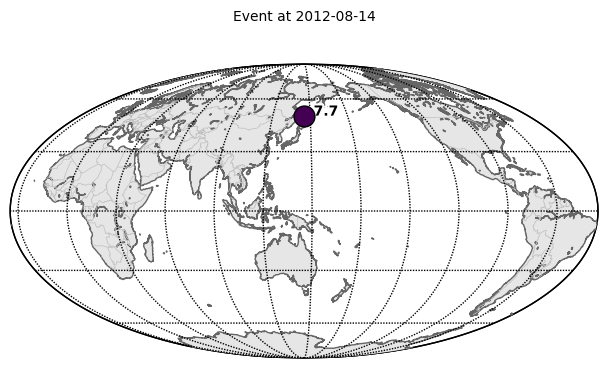

Figure(432x288)


In [2]:
import obspy

# Event information is stored in the QuakeML file.
cat = obspy.read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.qml")
print cat
print cat.plot()

**b)** Print the stations informations of MM array (using stationXML file)

In [3]:
# Station information is stored in the StationXML file.
inv = obspy.read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml")
print inv

Inventory created at 2014-02-11T16:53:19.000000Z
	Created by: fdsn-stationxml-converter/1.0.0
		    http://www.iris.edu/fdsnstationconverter
	Sending institution: None
	Contains:
		Networks (1):
			3D
		Stations (15):
			3D.MM01 (MM01)
			3D.MM02 (MM02)
			3D.MM03 (MM03)
			3D.MM04 (MM04)
			3D.MM05 (MM05)
			3D.MM06 (MM06)
			3D.MM07 (MM07)
			3D.MM08 (MM08)
			3D.MM09 (MM09)
			3D.MM10 (MM10)
			3D.MM11 (MM11)
			3D.MM12 (MM12)
			3D.MM13 (MM13)
			3D.MM14 (MM14)
			3D.MM15 (MM15)
		Channels (45):
			3D.MM01..HHZ, 3D.MM01..HHN, 3D.MM01..HHE, 3D.MM02..HHZ, 
			3D.MM02..HHN, 3D.MM02..HHE, 3D.MM03..HHZ, 3D.MM03..HHN, 
			3D.MM03..HHE, 3D.MM04..HHZ, 3D.MM04..HHN, 3D.MM04..HHE, 
			3D.MM05..HHZ, 3D.MM05..HHN, 3D.MM05..HHE, 3D.MM06..HHZ, 
			3D.MM06..HHN, 3D.MM06..HHE, 3D.MM07..HHZ, 3D.MM07..HHN, 
			3D.MM07..HHE, 3D.MM08..HHZ, 3D.MM08..HHN, 3D.MM08..HHE, 
			3D.MM09..HHZ, 3D.MM09..HHN, 3D.MM09..HHE, 3D.MM10..HHZ, 
			3D.MM10..HHN, 3D.MM10..HHE, 3D.MM11..HHZ, 3D.MM11..HHN, 
			3D.MM11..HHE

### 1) Seismograms and Move-out of different waves.

Read the Morocco data (event 2). The data have been cut to a start time of 14th August 2012 2:30 for 5400 s

In this event we are concentrating on the time range between the PcP wave and the PP wave.

**a)** Display the data as a normal seismogram section (all data, z-component only). 

Use st.select to select Z-components.


In [4]:
import obspy
st = obspy.Stream()
st.select?

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM03..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM04..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM05..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM06..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM07..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM08..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM09..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM10..HHZ | 2012-08-14T02:30:00.000000Z - 2012-08-14T04:00:00.000000Z | 20.0 Hz, 108001 samples
3D.MM11..HHZ | 2012-08-14T02:30:00.010000Z - 2012-08-14T04:00:00.010000Z | 20.0 Hz, 10

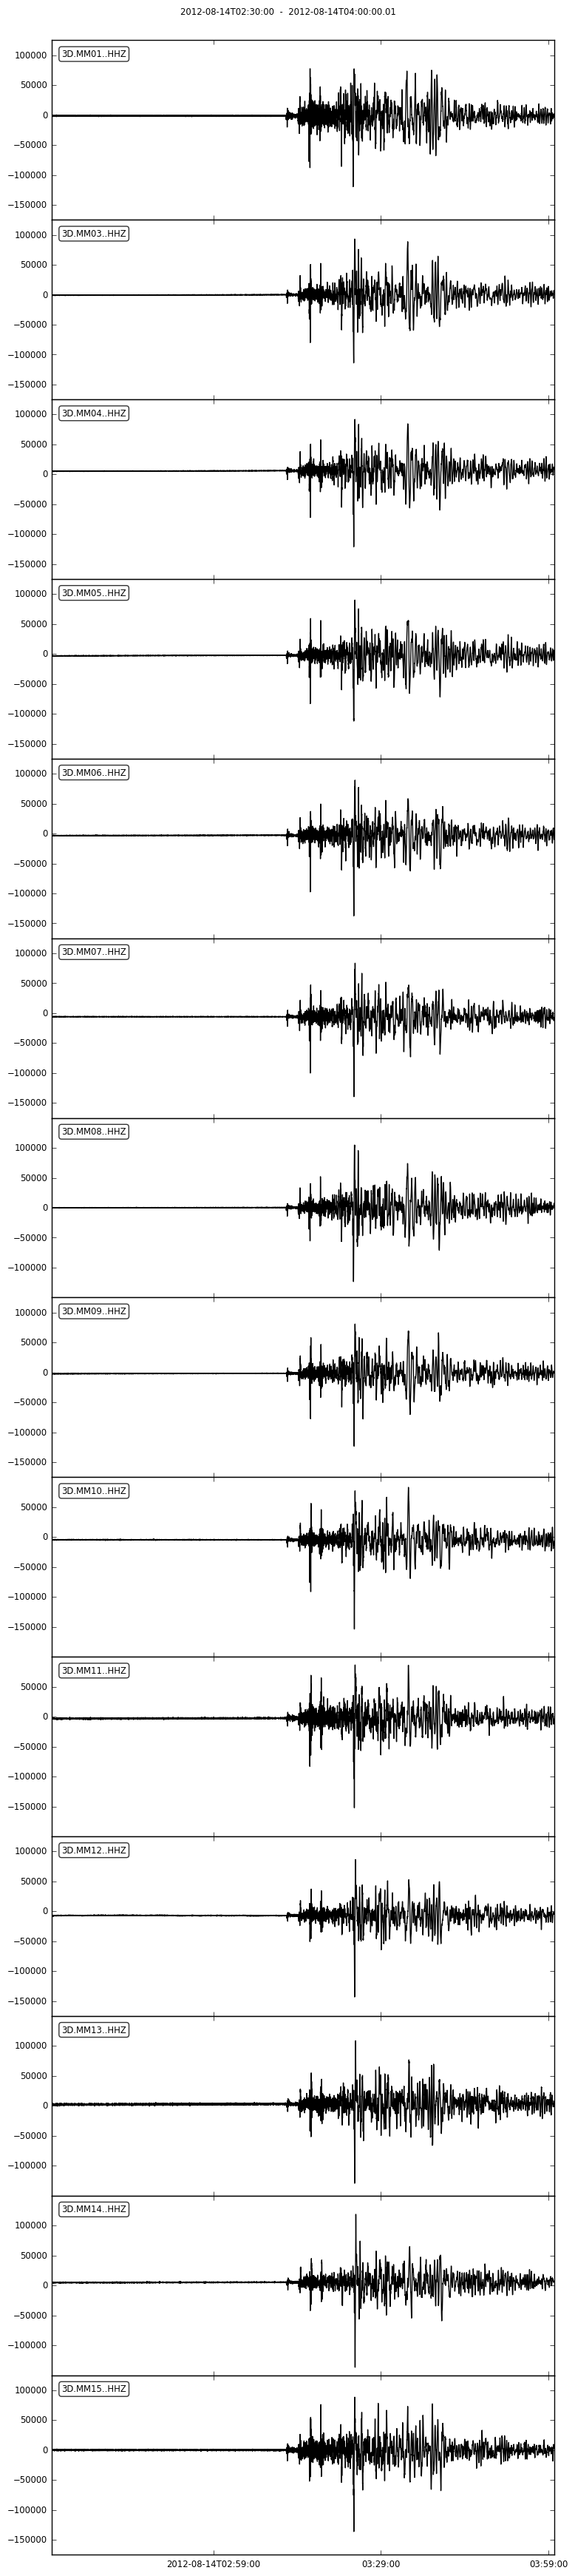

In [13]:
import obspy

# The first step is to read in the data.
st = obspy.read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")
vertical_components = st.select(component="Z")
print vertical_components
vertical_components.plot()


**b)** Often a distance dependent plot shows the different move-out of seismic arrivals and gives an idea of the slowness that could be expected. Produce a distance dependent plot of the data, use the time of 3:11:00 to 3:18:00 for the Morocco event (event 2) (if possible with phases marked - note P and PcP arrive at almost the same time)

use show_distance_plot
(with catalog and inventory from above).

In [14]:
show_distance_plot?

Object `show_distance_plot` not found.


In [15]:
#z = AA('', inv)
#z.plot_power(plot_frequency=None, show=True)
import obspy
show_distance_plot(vertical_components, cat[0], inv, obspy.UTCDateTime('2012-08-14T3:11:00'), obspy.UTCDateTime('2012-08-14T3:18:00'), plot_travel_times=True)

NameError: name 'show_distance_plot' is not defined

**c)** As it is difficult to see different move-outs if the data are not aligned on a single phase, it is often useful to align. Align the data on the first arrival (P) and the different  move-out for each of the phases becomes visible. 

Use align_phases and asign them to a stream st (st=align_phases...), 
take only the z-component and catalog and inventory from above)

plot traces again as distance dependent plot (show_distance_plot)

In [16]:
align_phases?

Object `align_phases` not found.


In [17]:
ap = align_phases(vertical_components, cat[0], inv,'P', method='simple')
show_distance_plot(ap, cat[0], inv, obspy.UTCDateTime('2012-08-14T3:11:00'), obspy.UTCDateTime('2012-08-14T3:18:00'), plot_travel_times=False)

NameError: name 'align_phases' is not defined

**d)** To see the move-out difference in more detail zoom in to the PP wave. Use 900 to 1100 s after origin time.

In [18]:
origin_time = cat[0].origins[0].time
t1 = origin_time + 900
t2 = origin_time + 1100
show_distance_plot(ap, cat[0], inv, t1, t2, plot_travel_times=False)


NameError: name 'show_distance_plot' is not defined

**e)** Filter events with different filters, best suited is bandpass filter 1-10s (teleseismic P-waves). Align the P wave and display a time window including the P and PP wave. Use times from 740 to 1150 s after origin.


In [19]:
origin_time = cat[0].origins[0].time
t1 = origin_time + 740
t2 = origin_time + 1150
st = ap.copy()
st.filter('bandpass',freqmin=0.1,freqmax=1.)
show_distance_plot(st, cat[0], inv, t1, t2, plot_travel_times=False)

NameError: name 'ap' is not defined

 - For the **first event**  in the table above (17 DEC1991) we are concentrating on the P and PcP wave:

The time range here is 17-Dec-91_6:49:30 to 6:50:30.

Plot the event on a world map.



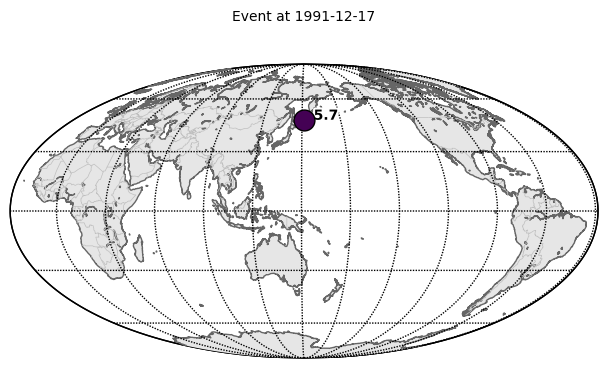

Figure(432x288)


In [23]:
import obspy
stream_1 = obspy.read("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.mseed")
cat_1 = obspy.read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.qml")
inv_1 = obspy.read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.xml", format="stationxml")

print cat_1.plot()

Plot the data in a distance dependent plot with the traces aligned on the P-wave.

This event (17 Dec 1991) shows the P-arrival and a secondary arrival with large amplitude.
The distance dependent plot with traces aligned on the P-arrival shows that the secondary arrival has a different move-out than the P-wave. It is perhaps useful to zoom in (6:49:30 to 6:50:30).
Use cat_1 and inv_1 for catalog and inventory.

In [39]:
import obspy
t1 = obspy.UTCDateTime('1991-12-17T06:49:30')
t2 = obspy.UTCDateTime('1991-12-17T06:50:30')
vert = stream_1.select(component='Z')
ap = align_phases(vert, cat_1[0], inv_1,'P', method='simple')
show_distance_plot(ap, cat_1[0], inv_1, t1, t2, plot_travel_times=False)

NameError: name 'align_phases' is not defined

## Reminder: Calculating theoretical backazimuth and slowness

From the delay times measured at each station with respect to the centre of the array, the slowness and backazimuth of a phase can be determined. The horizontal slowness $u_{hor}$ and backazimuth $\Phi$ are calculated, assuming all receivers are sea level and a plane wave arrival, using the following formula (Schweitzer et al., 2002):

$$ t_j = \frac{d_j}{v_{app}} = \frac{-x_j  \sin \Phi - y_j \cos \Phi}{v_{app}}$$

 

$$ v_{app} = \frac{-x_j  \sin \Phi - y_j \cos \Phi}{t_j} $$

<img src="http://earth.uni-muenster.de/~msaki_01/figure1.png">

Beamforming could be used here but the process is lengthy and tedious and helps to enhance only the phase with a known backazimuth and slowness. Wrong backazimuths could also introduce misleading waveforms. It is important to note that the delay times could be influences by the subsurface and could provide erroneous stacks (more later).

Skipping the beamforming we will proceed to vespagram analysis.


### 3) Vespagram (velocity spectral analysis)
#### 3a) Perform linear vespagram for theo baz
To make the process easier, a vespagram (velocity spectral analysis) is produced. Here the traces are shifted and stacked for a theoretical backazimuth and a range of slowness-values (or vice versa). A linear stack will look very wiggly and the slowness resolution will not be very good. 

Still it is worth to try for the two events, for large aperture arrays and a large number of stations this may still work well. To perform waveform studies, a linear stack (vespagram) is imperative.

Read in the Morocco data again:

The azimuth of the centre of the array is used (17 deg). Try different slowness ranges  between 0 and 10 s/deg for the vespagram but do not exceed the slowness increment of 0.2 to 0.5. 
Time range from 20 sec before Pdiff to 50 s after PP (or absolute times 3:11:40 to 3:17:00)
use the delay and sum (DLS) option and an nthroot of 1 (for the linear stack).
You can try broadband data or different filters (e.g., 0.1 to 4 Hz) and zoom-values (e.g. 10). 
Use the plot_trace=True option wor wiggles.


In [40]:
AA.vespagram?

In [5]:
from obspy import read, UTCDateTime, read_events, read_inventory
st =read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")
t1 = UTCDateTime(2012, 8, 14, 3, 11, 40)
t2 = UTCDateTime(2012, 8, 14, 3, 17)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
print vertical_components

ev = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.qml")[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml")

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

#(vertical_components, ev, inv, "DLS", frqlow=0.1, frqhigh=4, baz=17, scale=10, nthroot=1, sl=(1, 10, 0.2))
print array.vespagram(vertical_components, 17, 1.0, 10.0, 0.2, t1, t2, latitude=None, longitude=None, absolute_height_in_km=None, method="DLS", nthroot=1, static3d=False, vel_cor=4.0)

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM03..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM04..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM05..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM06..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM07..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM08..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM09..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM10..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM11..HHZ | 2012-08-14T03:11:40.010000Z - 2012-08-14T03:17:00.010000Z | 20.0 Hz, 6401 samples
3D.MM12

ValueError: negative dimensions are not allowed

Make the vespagram in contour plot (plot_trace=false) - sometimes it looks better in a contour plot

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM03..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM04..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM05..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM06..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM07..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM08..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM09..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM10..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM11..HHZ | 2012-08-14T03:11:40.010000Z - 2012-08-14T03:17:00.010000Z | 20.0 Hz, 6401 samples
3D.MM12

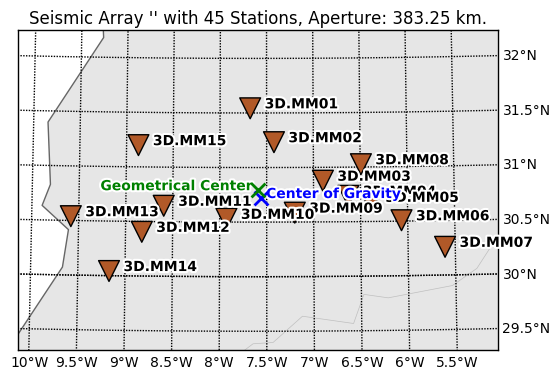

Figure(432x288)


ValueError: negative dimensions are not allowed

In [6]:
from obspy import read, UTCDateTime, read_events, read_inventory
st =read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")
t1 = UTCDateTime(2012, 8, 14, 3, 11, 40)
t2 = UTCDateTime(2012, 8, 14, 3, 17)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
print vertical_components

ev = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.qml")[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml")

print 'Center of Gravity:'
array = AA('', inv) 
print array.plot()

#(vertical_components, ev, inv, "DLS", frqlow=0.1, frqhigh=4, baz=17, scale=10, nthroot=1, sl=(1, 10, 0.2))
print array.vespagram(vertical_components, 17, 1.0, 10.0, 0.2, t1, t2, latitude=None, longitude=None, absolute_height_in_km=None, method="DLS", nthroot=1, static3d=False, vel_cor=4.0)


#### 3b) Perform 4th root vespa for theo baz

To have a better resolution for the arrivals in the vespagram, a 4th root stack should be produced. The waveforms are poorer, the slowness resolution is much better. Both events (event 1 and 2) show clear arrivals, P and PdP (the D" reflection) in the first event can clearly be seen, P/PcP and PP can clearly be distinguished in the second example.

The first exercise is for the event recorded at the Morocco stations (event2)

Use the same parameters as for the linear vespagram but with a 4th root stacking option (you can try different nthroot values as well).
Try different slowness ranges between 0 and 10 s/deg with increments of 0.2 s/deg. Try different filters. 

In [48]:
from obspy import read, UTCDateTime, read_events, read_inventory
st =read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")
t1 = UTCDateTime(2012, 8, 14, 3, 11, 40)
t2 = UTCDateTime(2012, 8, 14, 3, 17)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
print vertical_components

ev = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.qml")[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml")

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

a = AA('', inv)
print AA.vespagram(a, vertical_components, 17, 1.0, 10.0, 0.2, t1, t2, latitude=None, longitude=None, absolute_height_in_km=None, method="DLS", nthroot=1, static3d=False, vel_cor=4.0)

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM03..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM04..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM05..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM06..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM07..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM08..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM09..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM10..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM11..HHZ | 2012-08-14T03:11:40.010000Z - 2012-08-14T03:17:00.010000Z | 20.0 Hz, 6401 samples
3D.MM12

ValueError: negative dimensions are not allowed

### 4) Perform pws for the same event
Phase weighted stacking produces a different kind of enhanced vespagram. To see the difference (or lack of?) PWS of the above events should be produced.
In the vespagram routine use PWS as option. Again try different slowness ranges and filters to get the best result.

In [46]:
from obspy import read, UTCDateTime, read_events, read_inventory
st =read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")
t1 = UTCDateTime(2012, 8, 14, 3, 11, 40)
t2 = UTCDateTime(2012, 8, 14, 3, 17)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
print vertical_components

ev = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.qml")[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml")

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

b = AA('', inv)
print AA.vespagram(b, vertical_components, ev, sll=1.0, slm=10.0, sls=0.5, starttime=t1, endtime=t2, latitude=None, longitude=None, absolute_height_in_km=None, method="PWS", nthroot=1.0,
                  static3d=False, vel_cor=4.0)

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM03..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM04..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM05..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM06..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM07..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM08..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM09..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM10..HHZ | 2012-08-14T03:11:40.000000Z - 2012-08-14T03:17:00.000000Z | 20.0 Hz, 6401 samples
3D.MM11..HHZ | 2012-08-14T03:11:40.010000Z - 2012-08-14T03:17:00.010000Z | 20.0 Hz, 6401 samples
3D.MM12

TypeError: float() argument must be a string or a number

For the **GRSN/GRF** array event, produce a 4th root vespagram and try different slowness values (between 0 and 10 s/deg, increment not exceeding 0.2s/deg), a backazimuth of the centre of the array (24deg) and a time around P and PcP (absolute time 17-dec-91_6:49:30 to 6:50:30). The P-wave is clearly visible, the second large arrival has a smaller slowness and two more arrivals are apparent, one is PcP (approximately 9.5 s after P and another arrivals with PcP slowness. 

In [17]:
from obspy import read, UTCDateTime, read_events, read_inventory
st = read("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.mseed")

vertical_components = st.select(component="Z")
t1 = UTCDateTime(1991, 12, 17, 6, 49, 30)
t2 = UTCDateTime(1991, 12, 17, 6, 50, 30)
vertical_components.trim(t1, t2) 

cat = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.qml")
ev = cat[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.xml", format='STATIONXML')

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

c = AA('', inv)
print AA.vespagram(c, vertical_components, 24, sll=3, slm=7, sls=0.1, starttime=t1, endtime=t2, latitude=None, longitude=None, absolute_height_in_km=None, method="DLS", nthroot=4,
                  static3d=False, vel_cor=4.0)

Center of Gravity:
{u'latitude': 49.720921219178081, u'absolute_height_in_km': 0.54241780821917807, u'longitude': 10.214692383561646}


ValueError: negative dimensions are not allowed

### 5) Perform sloaz for the Morocco data with longer time window or moving time window

If slowness and backazimuth of the data are not known (or true, i.e. measured, values should be determined) a sloaz analysis can be produced. Here chose a time window around the Pdiff arrival (or any other arrival that you like) and produce a sloaz analysis. The range of backazimuths depends on the theoretical backazimuth. 

For the Event recorded in Morocco the theoretical backazimuth is 17.3 degrees. The slowness range is determined by the theoretical slowness values of the phase we are interested in. For Pdiff to PP the range should be between 0 and 10 s/deg.

The window that includes Pdiff and PP is between time 3:11:30 to 3:14:30.
Produce slowness_backazimuth plot for two windows, one around Pdiff, one around PP (hint: import array_analysis_helper routine from mess2014)

Don't plot the array response function here, use method "FK" and baz_plot=True. Also test different values for the slowness (slx, sly) to find the best fitting values.

In [7]:
AA._array_analysis_helper?

14 Trace(s) in Stream:
3D.MM01..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM03..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM04..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM05..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM06..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM07..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM08..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM09..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM10..HHZ | 2012-08-14T03:11:30.000000Z - 2012-08-14T03:14:30.000000Z | 20.0 Hz, 3601 samples
3D.MM11..HHZ | 2012-08-14T03:11:30.010000Z - 2012-08-14T03:14:30.010000Z | 20.0 Hz, 3601 samples
3D.MM12

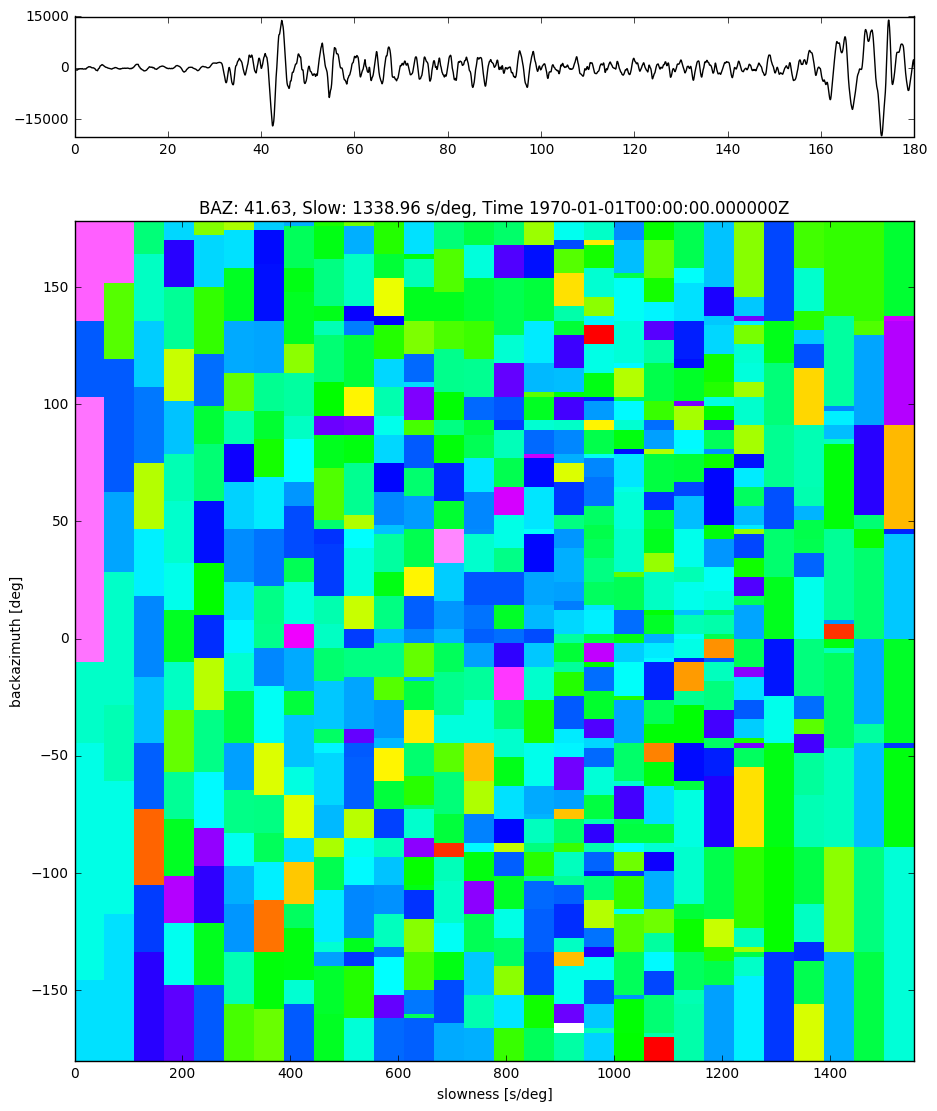

In [9]:
from obspy import read, UTCDateTime, read_events, read_inventory
st = read("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.mseed")

vertical_components = st.select(component="Z")
t1 = UTCDateTime(2012, 8, 14, 3, 11, 30)
t2 = UTCDateTime(2012, 8, 14, 3, 14, 30)
vertical_components.trim(t1, t2) 
print vertical_components

inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/02_MM/02.xml", format='STATIONXML')

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity


d = AA('', inv)
print d.fk_analysis(vertical_components, frqlow=0.1,
                            frqhigh=4, prefilter=True, static3d=False, vel_corr=4.8, wlen=-1, wfrac=0.8, slx=(-10, 10),
                               sly=(-10, 10), sls=0.5, plots=('baz_slow_map'))

### 6) Display array response function in fk and sloaz display

Here we introduce the concept of array response function. The array response function depends on the array configuration and signal frequency.  The best examples are usually Yellowknife data since the ARF is a cross (like the array) and can be recognised very well in the fk plot.

Perform fk analysis for the Yellowknife array. Use default slowness values (you will need to use array_transfer_helper and array_analysis_helper (with baz_plot=False)).

In [34]:
AA._array_transff_helper?

Center of Gravity:
{u'latitude': 62.49938888888888, u'absolute_height_in_km': 0.16378888888888887, u'longitude': -114.67827777777777}


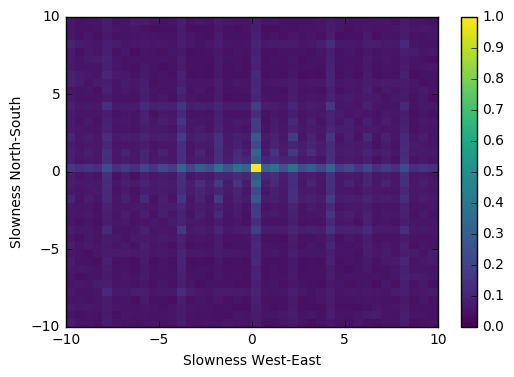

3000
Total time in routine: 1.612576

1970-01-01T00:00:00.000000Z


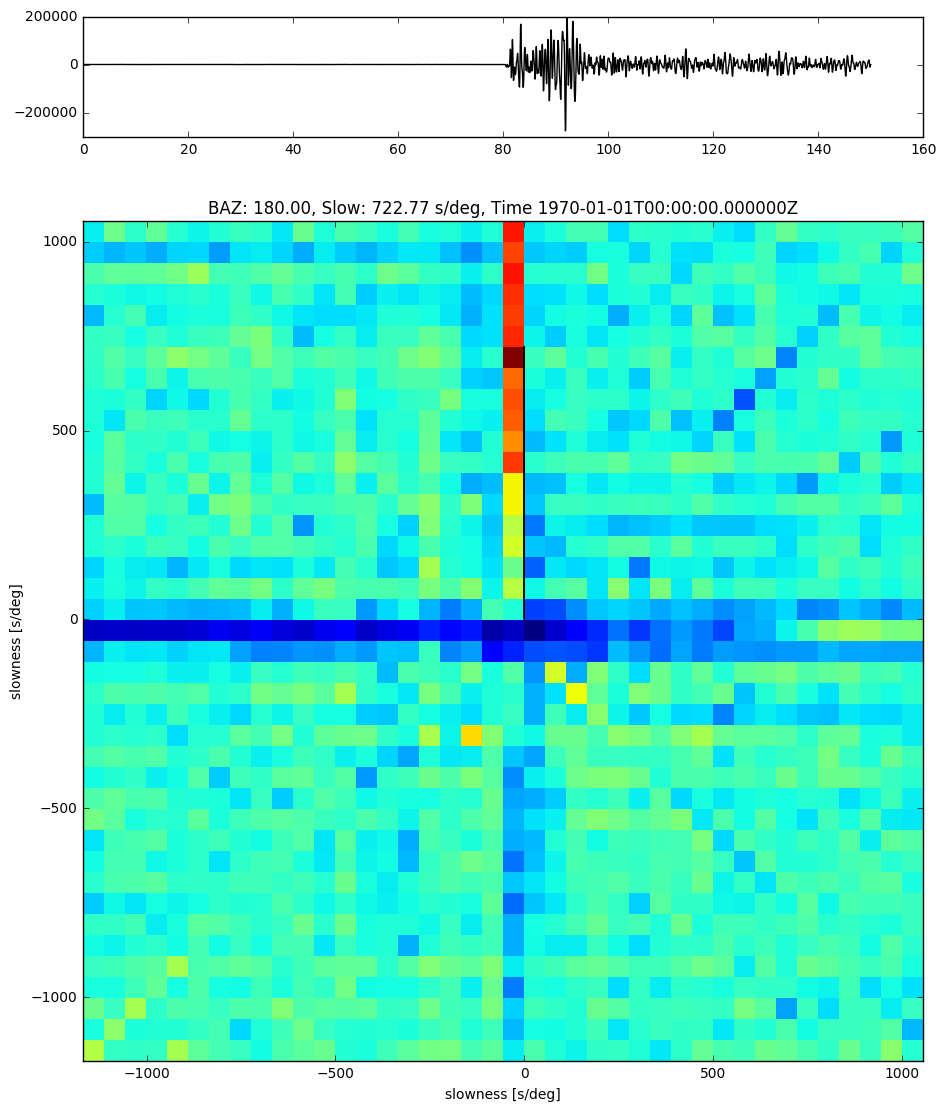

In [11]:
from obspy import read, UTCDateTime, read_events, read_inventory
st = read("/Users/admin/Desktop/Seismo_job/MESS2014_new/03_YKA/03.mseed")


vertical_components = st.select(component="Z")
t1 = UTCDateTime(2012, 8, 14, 3, 6, 30)
t2 = UTCDateTime(2012, 8, 14, 3, 9, 0)
vertical_components.trim(t1, t2) 

inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/03_YKA/03.xml", format='STATIONXML')

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

z = AA('', inv)
ff = z.plot_transfer_function_freqslowness(slim=10, sstep=0.5, freq_min=0.1, freq_max=4, freq_step=0.1)
#ff = z._array_transff_helper(plim=10, pstep=0.5, param='slowness', fmin=0.1, fmax=4, fstep=0.1)
#AA._plot_transff_helper(ff, lim=10, step=0.5)
print AA._array_analysis_helper(z, vertical_components, method="FK", frqlow=0.1, frqhigh=4, prefilter=True, static3d=False, vel_corr=4.8, wlen=-1, wfrac=0.8, slx=(-10, 10), sly=(-10, 10), sls=0.5, plots=('slowness_xy'))



### 7) FK analysis (Frequency-Wavenumber analysis)
#### 7a) perform fk analysis for P-wave

Use the GRF array data only, fk can usually only be done for small time windows to avoid interfering phases. For the GRF data, chose a time window of absolute time 17-dec-9_6:49:55 to 6:50:02).  Try different slowness ranges to find a fitting slowness range (from 0 to 12s/deg). 

In [68]:
from obspy import read, UTCDateTime, read_events, read_inventory
st = read("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.mseed")

vertical_components = st.select(component="Z")
t1 = UTCDateTime(1991, 12, 17, 6, 49, 55)
t2 = UTCDateTime(1991, 12, 17, 6, 50, 2)
vertical_components.trim(t1, t2) 
print vertical_components

cat = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.qml")
ev = cat[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.xml", format='STATIONXML')

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity


a = AA('', inv)
AA._array_analysis_helper(a, vertical_components, method='FK', frqlow=0.1, frqhigh=4, prefilter=True, static3d=False, vel_corr=4.8, wlen=-1, wfrac=0.8, slx=(-10, 10),
                               sly=(-10,10), sls=0.5,
                               plots=('slowness_xy'))


19 Trace(s) in Stream:
GR.GRA1..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRA2..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRA3..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRA4..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRB1..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRB2..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRB3..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRB4..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRB5..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRC1..BHZ | 1991-12-17T06:49:55.000000Z - 1991-12-17T06:50:02.000000Z | 20.0 Hz, 141 samples
GR.GRC2..BHZ | 19

AttributeError: 'Inventory' object has no attribute 'trim'

#### 7b) perform fk-analysis for PdP wave

To see the difference to the P-wave, the secondary arrival (it is PdP, the reflection off the D" discontinuity) can be analysed with the fk-analysis: chose a time window from 17-dec-9_6:50:01 to 6:50:06. The slowness range should be as before (in the range of 0-12 s/deg). The slowness values for PdP are smaller (while the backazimuth is very similar to the P wave) and therefore cannot be a depth phase or Moho multiple. If projecting the PdP wave back with the measured slowness, it turns out to be reflected off the D" discontinuity.



19 Trace(s) in Stream:
GR.GRA1..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRA2..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRA3..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRA4..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRB1..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRB2..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRB3..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRB4..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRB5..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRC1..BHZ | 1991-12-17T06:50:01.000000Z - 1991-12-17T06:50:06.000000Z | 20.0 Hz, 101 samples
GR.GRC2..BHZ | 19

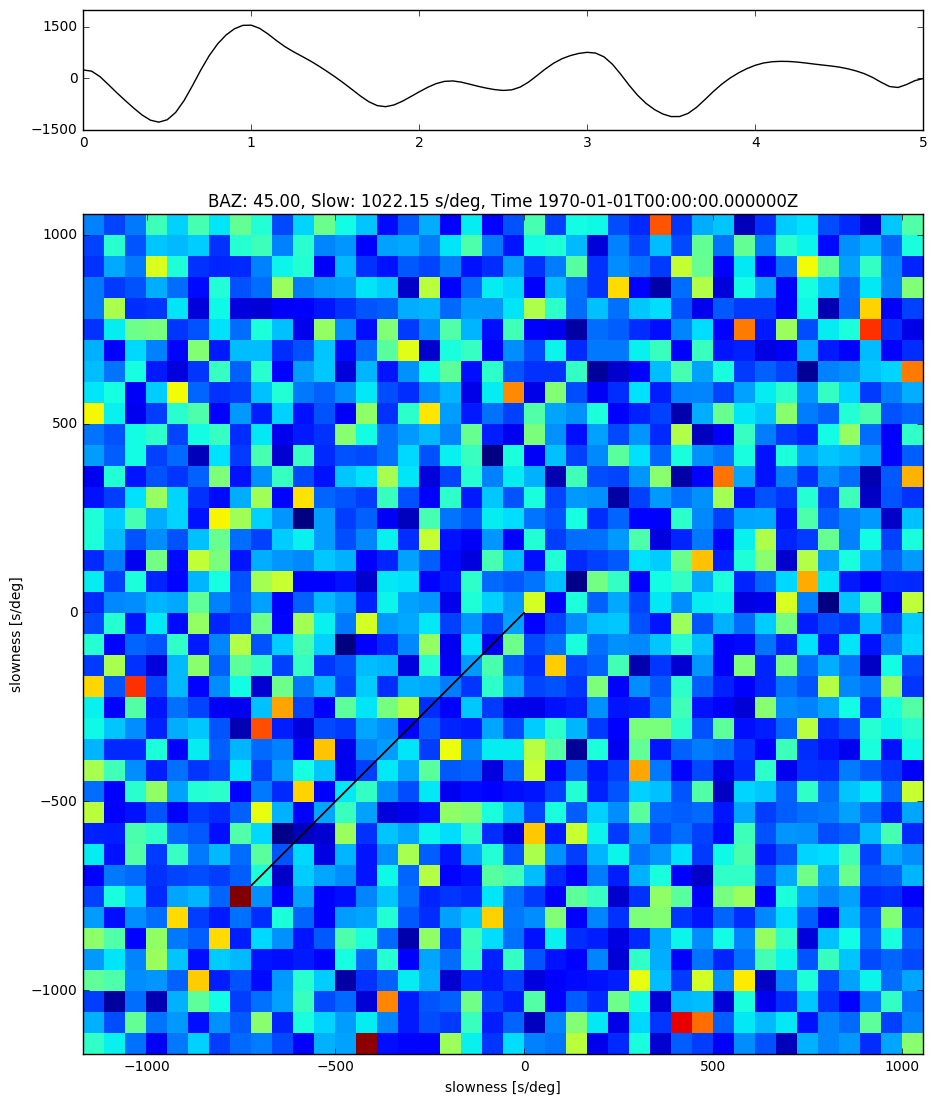

In [7]:
from obspy import read, UTCDateTime, read_events, read_inventory
st = read("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.mseed")

vertical_components = st.select(component="Z")
t1 = UTCDateTime(1991, 12, 17, 6, 50, 1)
t2 = UTCDateTime(1991, 12, 17, 6, 50, 6)
vertical_components.trim(t1, t2) 
print vertical_components

cat = read_events("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.qml")[0]
inv = read_inventory("/Users/admin/Desktop/Seismo_job/MESS2014_new/01_GRSN_GRF/01.xml", format='STATIONXML')

print 'Center of Gravity:'
array = AA('', inv) 
print array.center_of_gravity

a = AA('', inv)
AA._array_analysis_helper(a, vertical_components, method='FK', frqlow=0.1, frqhigh=4, prefilter=True, static3d=False, vel_corr=4.8, wlen=-1, wfrac=0.8, slx=(-10, 10),
                               sly=(-10,10), sls=0.5,
                               plots=('slowness_xy'))


You can try different times windows as well and see whether you can see PcP as well!